# Credit Card Fraud Detection using Machine Learning

##### Step 1: Import Required Libraries

In [4]:
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical computations
from sklearn.model_selection import train_test_split  # For splitting dataset into training and test sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest model for classification
from sklearn.pipeline import Pipeline  # To create a machine learning pipeline
from sklearn.preprocessing import StandardScaler  # To normalize/scale features
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  # For evaluating the model
from imblearn.over_sampling import SMOTE  # For handling class imbalance by oversampling minority class
import joblib  # To save the trained model
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For better visualization (heatmaps, boxplots, etc.)

##### Step 2: Load Dataset

In [6]:
df = pd.read_csv("creditcard.csv")  # Load the dataset from CSV file
print("✅ Dataset loaded:", df.shape)  # Confirm data loaded and print its shape

✅ Dataset loaded: (20000, 31)


##### Step 3: Initial Data Exploration

In [10]:
# print(df.head())  # View first few rows of the dataset
# print(df.shape)  # Print the shape (rows, columns)
# print(df.info())  # Show column datatypes and non-null counts
# print(df.isnull().sum())  # Check for missing values in each column

##### Step 4: Explore Class Distribution (Understand the class imbalance)

Original class distribution:
Class
0    19936
1       64
Name: count, dtype: int64


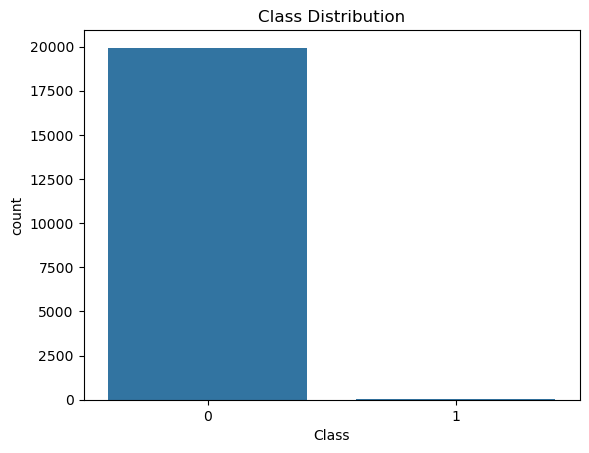

In [12]:
print("Original class distribution:") # Print a heading to indicate the start of class distribution output
print(df["Class"].value_counts())  # Count normal (0) and fraud (1) transactions
sns.countplot(x="Class", data=df)  # Visualize the distribution of classes
plt.title("Class Distribution") # Add a title to the plot
plt.show() # Display the plot

##### Step 5: Check Correlation Between Features (especially with 'Class')

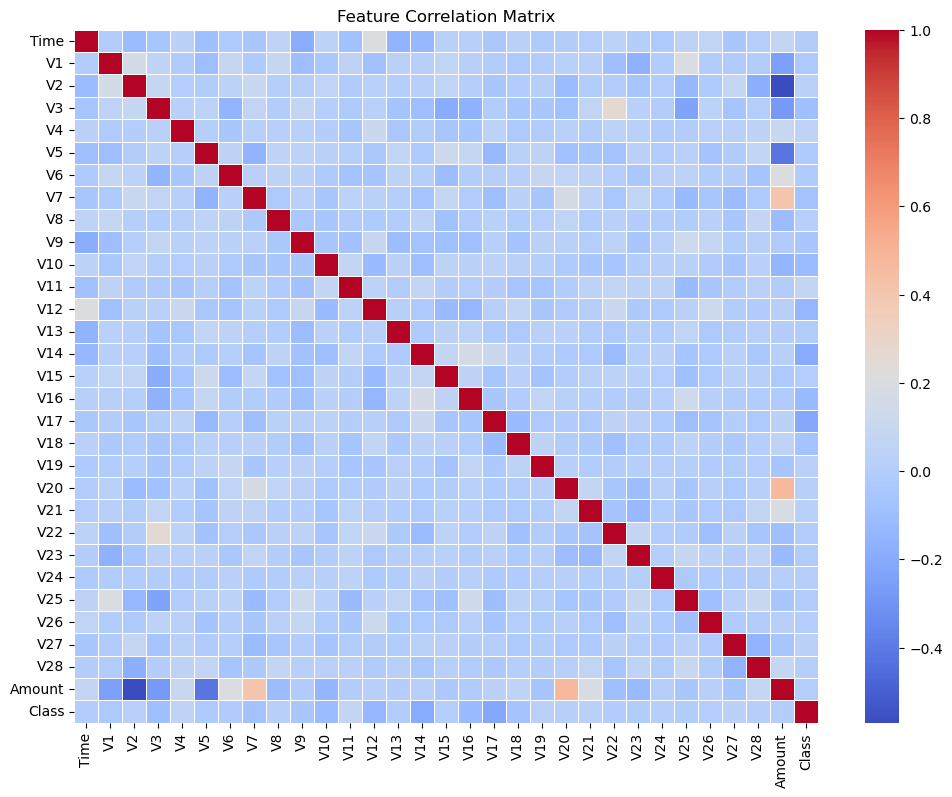

In [14]:
plt.figure(figsize=(12, 9)) # Set the size of the figure to 12x9 inches
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5) # Create a heatmap to visualize the correlation matrix of the DataFrame
# 'df.corr()' calculates pairwise correlation of all numerical columns
# 'cmap="coolwarm"' sets the color scheme
# 'linewidths=0.5' adds lines between cells for better readability
plt.title("Feature Correlation Matrix") # Add a title to the heatmap
plt.show() # Display the heatmap

##### Step 6: Visualize Amount Feature by Class (optional, to inspect outliers)

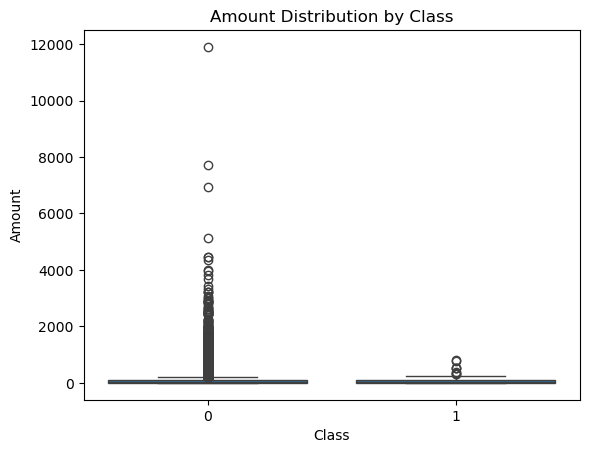

In [16]:
sns.boxplot(x="Class", y="Amount", data=df)  # Create a boxplot to compare transaction amounts between normal and fraud classes
plt.title("Amount Distribution by Class") # Add a title to the plot
plt.show() # Display the plot

##### Step 7: Prepare Features and Target

In [21]:
X = df.drop(columns=["Time", "Class"])  # Drop 'Time' (not useful) and 'Class' (target variable)
y = df["Class"]  # Set target variable (fraud = 1, not fraud = 0)

##### Step 8: Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)  # Split data, preserving class distribution
print("Before SMOTE:")
print(" - Fraud count:", sum(y_train == 1))  # Number of fraud cases before SMOTE
print(" - Normal count:", sum(y_train == 0))  # Number of normal transactions before SMOTE

Before SMOTE:
 - Fraud count: 51
 - Normal count: 15949


##### Step 9: Handle Class Imbalance Using SMOTE

In [29]:
smote = SMOTE(random_state=42)  # Initialize SMOTE oversampler
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # Apply SMOTE to training set
print("After SMOTE:")
print(" - Fraud count:", sum(y_resampled == 1))  # Fraud count after SMOTE
print(" - Normal count:", sum(y_resampled == 0))  # Normal count after SMOTE (should match fraud)

After SMOTE:
 - Fraud count: 15949
 - Normal count: 15949


##### Step 10: Create and Train Pipeline

In [33]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Step 1: Scale features to zero mean and unit variance
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))  # Step 2: Use Random Forest model
])

pipeline.fit(X_resampled, y_resampled)  # Train the pipeline on balanced training data

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

##### Step 11: Evaluate Model

In [37]:
y_pred = pipeline.predict(X_test)  # Predict classes on test set
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Predict class probabilities for ROC AUC
# Print classification metrics
print("\n🔍 Classification Report:\n")  # Print a heading to indicate the start of the classification report output
print(classification_report(y_test, y_pred, digits=4))  # Print precision, recall, f1-score


🔍 Classification Report:

              precision    recall  f1-score   support

           0     0.9972    0.9995    0.9984      3987
           1     0.5000    0.1538    0.2353        13

    accuracy                         0.9968      4000
   macro avg     0.7486    0.5767    0.6168      4000
weighted avg     0.9956    0.9968    0.9959      4000



📊 Confusion Matrix:


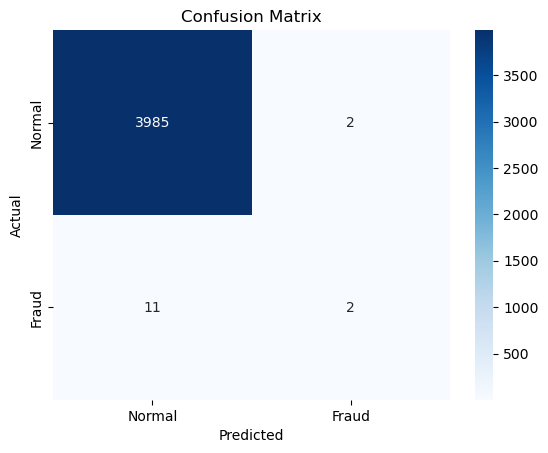

In [39]:
# Plot confusion matrix
print("📊 Confusion Matrix:") # Print a heading to indicate that the confusion matrix will follow
cm = confusion_matrix(y_test, y_pred)  # Compute the confusion matrix using true and predicted labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])  # Plot the confusion matrix as a heatmap with labels and color
plt.xlabel("Predicted") # Label the x-axis as 'Predicted'
plt.ylabel("Actual") # Label the y-axis as 'Actual'
plt.title("Confusion Matrix")  # Add a title to the plot
plt.show() # Display the plot

In [41]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)  # Calculate the ROC AUC score to evaluate model's ability to distinguish between classes
print(f"🧠 ROC AUC Score: {roc_auc:.4f}")  # Print the ROC AUC score with 4 decimal places

# Step 12: Save Trained Model
joblib.dump(pipeline, "credit_card_model.pkl")  # Save trained pipeline to file
print("✅ Model saved as 'credit_card_model.pkl'")

🧠 ROC AUC Score: 0.6354
✅ Model saved as 'credit_card_model.pkl'
